In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Reading the Dataset

In [ ]:
df=pd.read_csv("/content/Fitness.csv")

In [ ]:
df.sample(20)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
493,494,17.0,68.30,8,Thu,PM,Cycling,1
1390,1391,8.0,83.35,12,Sat,PM,Strength,0
668,669,13.0,78.87,8,Thu,AM,Yoga,1
866,867,15.0,83.72,4,Tue,AM,Cycling,0
617,618,3.0,86.95,14,Sun,AM,HIIT,0
353,354,18.0,78.63,7,Wed,PM,Cycling,0
819,820,7.0,78.28,3,Tue,PM,Cycling,1
1476,1477,12.0,74.00,4,Tue,AM,HIIT,1
3,4,5.0,86.12,10,Fri,AM,Cycling,0
1066,1067,15.0,88.37,14,Sun,AM,HIIT,0


In [ ]:
print("-> Here it gives the complete details of the data")
print("")
print("-> whether the data contains null values, datatypes & range(rows&columns):")
print("")
df.info()

-> Here it gives the complete details of the data

-> whether the data contains null values, datatypes & range(rows&columns):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1471 non-null   float64
 2   weight            1395 non-null   float64
 3   days_before       1478 non-null   object 
 4   day_of_week       1465 non-null   object 
 5   time              1466 non-null   object 
 6   category          1470 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [ ]:
print("In this step we see the complete nullvalues in the data")
print("")
df.isnull().sum()

In this step we see the complete nullvalues in the data



booking_id            0
months_as_member     29
weight              105
days_before          22
day_of_week          35
time                 34
category             30
attended              0
dtype: int64

# *From Here We Start of Cleaning the Data*

In [ ]:
print("In the place of '-'symbol i am replacing with 'NONE' ")
df["category"].replace({"-":"NONE"},inplace=True)

In the place of '-'symbol i am replacing with 'NONE' 


In [ ]:
df["category"].value_counts()

HIIT        657
Cycling     370
Strength    226
Yoga        133
Aqua         72
NONE         12
Name: category, dtype: int64

In [ ]:
print("Checking the unique values in the 'time': ")
df["time"].value_counts()

Checking the unique values in the 'time': 


AM    1116
PM     350
Name: time, dtype: int64

In [ ]:
am=df[df["time"]=="AM"][["time","category"]]
print("The Total Members how are coming in 'AM': ",sep="\n")
am

The Total Members how are coming in 'AM': 


,time,category
1,AM,HIIT
2,AM,Strength
3,AM,Cycling
4,AM,HIIT
5,AM,Cycling
...,...,...
1495,AM,HIIT
1496,AM,Strength
1497,AM,HIIT
1498,AM,Aqua


In [ ]:
am=am.replace({"AM":1})
print("Here we converting the AM with 1: ",sep="\n")
am

Here we converting the AM with 1: 


,time,category
1,1,HIIT
2,1,Strength
3,1,Cycling
4,1,HIIT
5,1,Cycling
...,...,...
1495,1,HIIT
1496,1,Strength
1497,1,HIIT
1498,1,Aqua


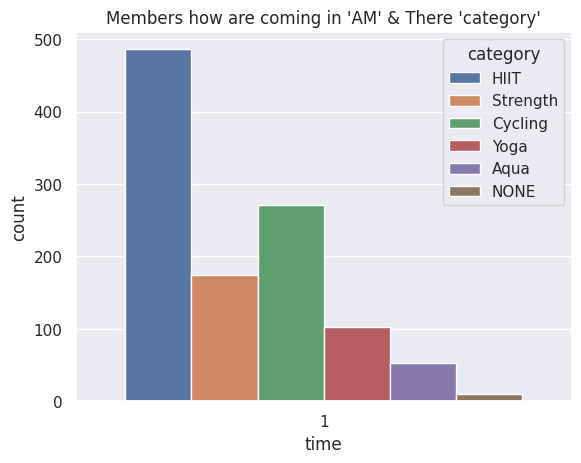

In [ ]:
sns.countplot(x="time",hue="category",data=am)
plt.title("Members how are coming in 'AM' & There 'category'")
plt.show()

**Here 1 represent 'AM'**

*   Here we can see that most of the members are coming to
   'HIIT' Category in morning 'AM'




In [ ]:
pm=df[df["time"]=="PM"][["time","category"]]
print("The Members how are coming in 'PM':",sep="\n")
pm


The Members how are coming in 'PM':


,time,category
0,PM,Strength
6,PM,HIIT
17,PM,Yoga
20,PM,Strength
27,PM,HIIT
...,...,...
1479,PM,HIIT
1485,PM,HIIT
1491,PM,HIIT
1492,PM,HIIT


In [ ]:
pm=pm.replace({"PM":1})
print("Replacing 'PM' with 1",sep="\n")
pm


Replacing 'PM' with 1


,time,category
0,1,Strength
6,1,HIIT
17,1,Yoga
20,1,Strength
27,1,HIIT
...,...,...
1479,1,HIIT
1485,1,HIIT
1491,1,HIIT
1492,1,HIIT


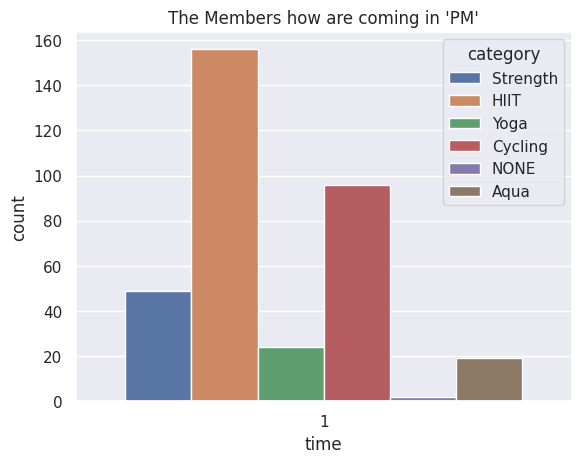

In [ ]:
sns.countplot(x="time",hue="category",data=pm)
plt.title("The Members how are coming in 'PM'")
plt.show()

**Here 1 represent the 'PM'**

*   Here we see that 'HIIT' Category has high demand In PM hours



From above two steps, I Thougt that according to some particular time slots the category or actives will take place so wherever i see null values in time feature thought to repalce with the help of the category feature. But the category unique items have no specific timings. The above steps are no been use to replace the nullvalues. So replacing the columns "time" & "category" with using "mode".  

In [ ]:
df.isnull().sum()

booking_id            0
months_as_member     29
weight              105
days_before          22
day_of_week          35
time                 34
category             30
attended              0
dtype: int64

In [ ]:
print("Filling the Null values with the 'AM'")
df["time"].fillna("AM",inplace=True)

Filling the Null values with the 'AM'


In [ ]:
print("Checking the most of the memebrs coming to which 'category'")
print("")
df["category"].mode()

Checking the most of the memebrs coming to which 'category'



0    HIIT
Name: category, dtype: object

In [ ]:
df["category"].fillna("HIIT",inplace=True)

Filling the Null values with 'HIIT'


In [ ]:
df.isnull().sum()

booking_id            0
months_as_member     29
weight              105
days_before          22
day_of_week          35
time                  0
category              0
attended              0
dtype: int64

In [ ]:
df.sample()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
240,241,10.0,77.81,5,Tue,PM,Cycling,1


In [ ]:
df["day_of_week"].value_counts()

Fri          270
Thu          234
Mon          213
Sun          211
Sat          196
Tue          193
Wed           78
Wednesday     35
Fri.          25
Monday        10
Name: day_of_week, dtype: int64

In [ ]:
df["day_of_week"].replace({"Wednesday":"Wed","Fri.":"Fri","Monday":"Mon"},inplace=True)

In [ ]:
df["day_of_week"].value_counts()

Fri    295
Thu    234
Mon    223
Sun    211
Sat    196
Tue    193
Wed    113
Name: day_of_week, dtype: int64

In [ ]:
df.sample()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
472,473,22.0,68.88,8,Thu,PM,HIIT,1


In [ ]:
df.isnull().sum()

booking_id            0
months_as_member     29
weight              105
days_before          22
day_of_week          35
time                  0
category              0
attended              0
dtype: int64

In [ ]:
print("Filling the NUll Values with Monday")
df["day_of_week"].fillna("Monday",inplace=True)

Filling the NUll Values with Monday


In [ ]:
print("The most repeated or commonly the appointment book is:")
df["days_before"].mode()


The most repeated or commonly the appointment book is:


0    10
Name: days_before, dtype: object

In [ ]:
print("Here we Filling the Null Values with 10")
df["days_before"].fillna(10,inplace=True)

Here we Filling the Null Values with 10


In [ ]:
df.isnull().sum()

booking_id            0
months_as_member     29
weight              105
days_before           0
day_of_week           0
time                  0
category              0
attended              0
dtype: int64

In [ ]:
weig=df[df["category"]=="Cycling"][["weight","category"]]
print("The category how are coming to cycling with there weights: ")
weig

The category how are coming to cycling with there weights: 


,weight,category
3,86.12,Cycling
5,93.33,Cycling
18,81.55,Cycling
19,72.93,Cycling
21,94.72,Cycling
...,...,...
1456,83.66,Cycling
1459,73.31,Cycling
1471,75.32,Cycling
1475,75.82,Cycling


In [ ]:
print("checking the mean for the feature 'weight' only who are coming to cycling: ")
weig["weight"].mean()

checking the mean for the feature 'weight' only who are coming to cycling: 


82.83277142857143

In [ ]:
print("Filling the nullvalues of 'weight' with the mean value")
df["weight"].fillna(82.83,inplace=True)


Filling the nullvalues of 'weight' with the mean value


In [ ]:
df["months_as_member"].value_counts().sort_values(ascending=False)

8.0      96
7.0      92
6.0      90
9.0      84
5.0      79
         ..
148.0     1
93.0      1
59.0      1
97.0      1
69.0      1
Name: months_as_member, Length: 72, dtype: int64

In [ ]:
print("Filling the nullvalues with Zero")
df["months_as_member"].fillna(0,inplace=True)

Filling the nullvalues with Zero


In [ ]:
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

# **Exploratory data analysis (EDA)**

In [ ]:
df.sample()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1046,1047,43.0,75.68,7,Tue,PM,Strength,0


In [ ]:
df["category"].value_counts()

HIIT        687
Cycling     370
Strength    226
Yoga        133
Aqua         72
NONE         12
Name: category, dtype: int64

In [ ]:
df.groupby(["category","weight"])[["category","weight","months_as_member"]].agg({"months_as_member":"mean"}).sample(10)

months_as_member
category weight                  
HIIT     76.07               20.0
Cycling  83.93               16.0
Yoga     82.26               17.0
Strength 82.16                8.0
HIIT     92.03                6.0
         79.07                9.0
Cycling  76.97               11.0
HIIT     65.69               97.0
Strength 87.43               21.0
         77.86               12.0

groupby with the category, weigh
it gives the aggregate of month_as_members mean

In [ ]:
print("Converting 'months_as_member' from float to int")
df["months_as_member"]=df["months_as_member"].astype(float).astype(int)

Converting 'months_as_member' from float to int


In [ ]:
df["months_as_member"].mean()

15.378

In [ ]:
member=df[df["months_as_member"]<=15][["months_as_member","weight","category"]]
member

,months_as_member,weight,category
1,10,79.01,HIIT
3,5,86.12,Cycling
4,15,69.29,HIIT
5,7,93.33,Cycling
6,11,88.59,HIIT
...,...,...,...
1490,6,105.12,Yoga
1491,8,87.76,HIIT
1493,9,80.46,HIIT
1494,15,88.50,HIIT


here we see that the members how are less tha 15 months as a members and there weights & category

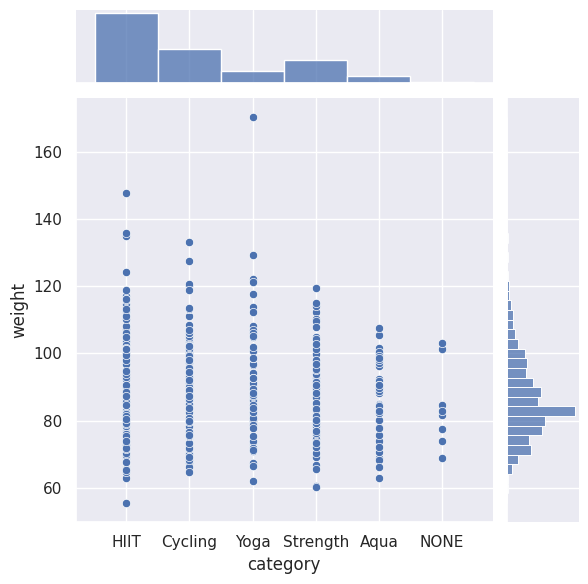

In [ ]:
sns.jointplot(x="category",y="weight",data=member)
plt.show()

Here in the jointplot we can see that the members how is less than 15 months as member. There weight and category

*   from the plot we can see that HIIT as the hight demand
     from all different weights
*   none of the members fall under the 'none' low coloumn



In [ ]:
df["weight"].mean()

82.61528000000001

In [ ]:
wig=df[df["weight"]>=82.6][["weight","category","time","day_of_week"]]
wig

,weight,category,time,day_of_week
3,86.12,Cycling,AM,Fri
5,93.33,Cycling,AM,Mon
6,88.59,HIIT,PM,Wed
7,89.52,HIIT,AM,Fri
9,82.83,HIIT,AM,Fri
...,...,...,...,...
1491,87.76,HIIT,PM,Mon
1494,88.50,HIIT,PM,Thu
1496,89.55,Strength,AM,Mon
1497,87.38,HIIT,AM,Tue


The weight above 82 there weight,time,category & day_of_week

In [ ]:
tme=wig["time"].value_counts()
tme

AM    555
PM    161
Name: time, dtype: int64

array([<Axes: ylabel='time'>], dtype=object)

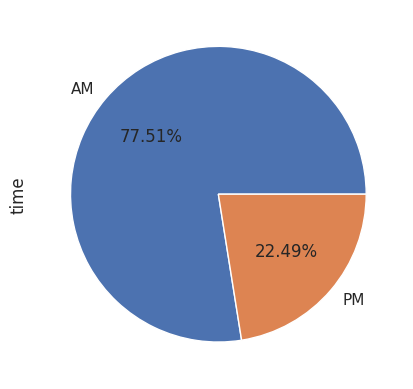

In [ ]:
tme.plot(kind="pie",subplots=True,autopct="%1.2f%%")

->from this piechart we can see that the age group above 82. Around
  77.51% are intrested in coming in the mornings "AM"

->Remaning 22.49% of them are willing to come in the "PM"


In [ ]:
above_82=wig["category"].value_counts()
above_82

HIIT        331
Cycling     181
Strength    102
Yoga         63
Aqua         34
NONE          5
Name: category, dtype: int64

array([<Axes: ylabel='category'>], dtype=object)

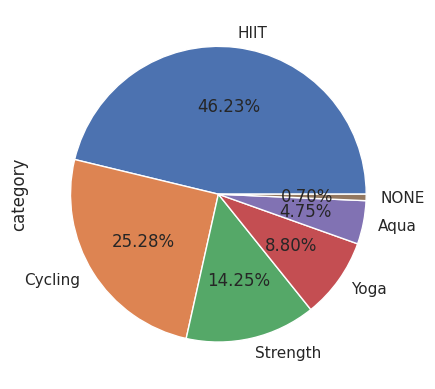

In [ ]:
above_82.plot(kind="pie",subplots=True,autopct="%1.2f%%")

 pie chat for "category" who are above 82.6 weight
*  46.23% members are for HIIT
*  0.70% fall under none category




In [ ]:
df.sample()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
56,57,3,100.9,10,Fri,AM,HIIT,0


In [ ]:
day=wig[wig["day_of_week"]=="Mon"][["day_of_week","category","weight","time"]]
day

,day_of_week,category,weight,time
5,Mon,Cycling,93.33,AM
21,Mon,Cycling,94.72,AM
24,Mon,Strength,92.24,AM
25,Mon,HIIT,85.67,AM
28,Mon,Strength,87.19,AM
...,...,...,...,...
1468,Mon,HIIT,82.79,AM
1486,Mon,Aqua,82.81,AM
1490,Mon,Yoga,105.12,AM
1491,Mon,HIIT,87.76,PM


from the above table we see that only on Monday. category,weight & time.

<Axes: xlabel='category', ylabel='weight'>

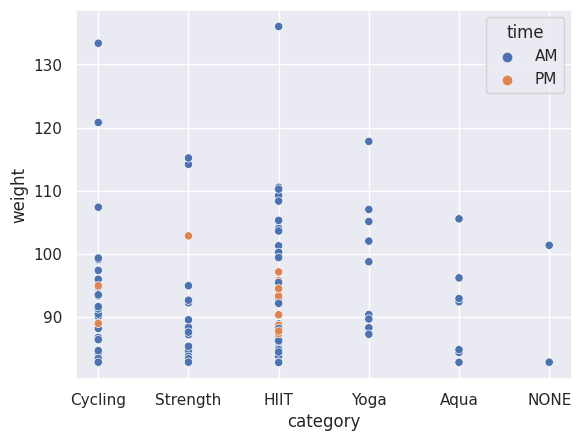

In [ ]:
sns.scatterplot(x="category",y="weight",hue="time",data=day)

Members who are coming only on Monday there category and weight with the timing

From above scatterplot we see cycling and Hiit category as demand.

Most of them are willing to come in AM compare to PM

In [ ]:
day.mode()

,day_of_week,category,weight,time
0,Mon,HIIT,82.83,AM


The most repeated or frequently category is "HIIT"

In [ ]:
day["time"].replace({"PM":1,"AM":0},inplace=True)

Time column is replaced with the 1 for "PM" and 0 with "AM"

In [ ]:
day[["category","weight","time"]].max()

category      Yoga
weight      136.02
time             1
dtype: object

 **The max weight with category & time**

In [ ]:
day[["category","weight","time"]].min()

category     Aqua
weight      82.79
time            0
dtype: object

**The minimum category with the weight & time**

In [ ]:
df.sample()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1443,1444,10,75.25,4,Tue,AM,HIIT,0


# **Training and Test**

In [ ]:
df.sample()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1335,1336,15,97.98,10,Fri,AM,HIIT,1


In [ ]:
dff=pd.get_dummies(df,columns=["time","category","day_of_week"])
dff

,booking_id,months_as_member,weight,days_before,attended,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,...,category_Strength,category_Yoga,day_of_week_Fri,day_of_week_Mon,day_of_week_Monday,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
0,1,17,79.56,8,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,10,79.01,2,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,16,74.53,14,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,4,5,86.12,10,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,5,15,69.29,8,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1496,1497,29,89.55,2,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1497,1498,9,87.38,4,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1498,1499,34,68.64,14,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


**Here converting the categorical columns to numeric columns with (1 and 0)**

In [ ]:
dff.sample()

,booking_id,months_as_member,weight,days_before,attended,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,...,category_Strength,category_Yoga,day_of_week_Fri,day_of_week_Mon,day_of_week_Monday,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
718,719,6,101.59,4,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dff.corr()

,booking_id,months_as_member,weight,attended,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_NONE,category_Strength,category_Yoga,day_of_week_Fri,day_of_week_Mon,day_of_week_Monday,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
booking_id,1.000000,0.015202,-0.010516,0.026693,-0.052749,0.052749,0.035882,0.022144,-0.024982,0.024766,-0.016191,-0.004162,0.023773,-0.052185,-0.090723,-0.003440,0.010010,0.011117,0.018924,0.038346
months_as_member,0.015202,1.000000,-0.450105,0.476331,0.010648,-0.010648,0.033114,-0.015720,0.006379,0.002556,-0.013749,0.004257,0.009174,-0.004917,-0.060895,0.027378,-0.010380,0.002326,0.008081,-0.007095
weight,-0.010516,-0.450105,1.000000,-0.274164,-0.009172,0.009172,-0.020039,0.010081,0.004749,-0.010175,-0.026264,0.027699,-0.001794,0.022136,-0.008843,-0.038984,0.014793,0.039497,-0.012580,-0.030123
attended,0.026693,0.476331,-0.274164,1.000000,0.051236,-0.051236,0.021777,-0.006688,0.029324,-0.026584,-0.042199,0.003805,0.006255,-0.014255,0.023135,0.002916,0.025616,0.008702,0.002537,-0.056089
time_AM,-0.052749,0.010648,-0.009172,0.051236,1.000000,-1.000000,-0.016222,-0.035346,0.000949,0.014155,0.016450,0.039000,0.241238,0.110912,0.033064,0.059550,-0.008009,-0.105992,-0.178729,-0.224752
time_PM,0.052749,-0.010648,0.009172,-0.051236,-1.000000,1.000000,0.016222,0.035346,-0.000949,-0.014155,-0.016450,-0.039000,-0.241238,-0.110912,-0.033064,-0.059550,0.008009,0.105992,0.178729,0.224752
category_Aqua,0.035882,0.033114,-0.020039,0.021777,-0.016222,0.016222,1.000000,-0.128488,-0.206412,-0.020165,-0.094574,-0.070040,-0.016948,0.028894,-0.014048,0.005478,-0.001148,0.015196,-0.011773,-0.016826
category_Cycling,0.022144,-0.015720,0.010081,-0.006688,-0.035346,0.035346,-0.128488,1.000000,-0.526011,-0.051387,-0.241008,-0.178486,-0.022437,-0.026112,0.003756,-0.006179,0.004241,0.013980,-0.021278,0.076918
category_HIIT,-0.024982,0.006379,0.004749,0.029324,0.000949,-0.000949,-0.206412,-0.526011,1.000000,-0.082551,-0.387171,-0.286731,0.013095,0.007018,0.026325,-0.038780,-0.021698,-0.015385,0.062365,-0.024102
category_NONE,0.024766,0.002556,-0.010175,-0.026584,0.014155,-0.014155,-0.020165,-0.051387,-0.082551,1.000000,-0.037823,-0.028011,0.030877,0.025579,-0.013880,-0.012612,-0.014809,-0.017984,0.010192,-0.025632


**Using LogisticRegression Algorithm**

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(["attended","days_before"],axis=1)
y=dff["attended"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=200)

spliting the data and training and testing

In [ ]:
from sklearn.linear_model import LogisticRegression
li=LogisticRegression(n_jobs=-1)

In [ ]:
li.fit(xtrain,ytrain)

LogisticRegression(n_jobs=-1)

In [ ]:
ypre=li.predict(xtest)
ypre

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0])

In [ ]:
li.score(xtest,ytest)

0.8044444444444444

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
ac1=accuracy_score(ytest,ypre)*100
print("The accuracy score for LogisticRegression:",ac1)

The accuracy score for LogisticRegression: 80.44444444444444


**Using DecisionTreeClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(["attended","days_before"],axis=1)
y=dff["attended"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier(max_depth=4,max_features=5,max_leaf_nodes=2)

In [ ]:
d.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, max_features=5, max_leaf_nodes=2)

In [ ]:
ypr=d.predict(xtest)
ypr

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1])

In [ ]:
d.score(xtest,ytest)

0.8222222222222222

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac2=accuracy_score(ytest,ypr)*100
print("The accuracy score DecisionTreeClassifier: ",ac2)

The accuracy score DecisionTreeClassifier:  82.22222222222221


In [ ]:
ytest.shape

(225,)

In [ ]:
ypr.shape

(225,)

**Using RandomForestClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(["attended","days_before"],axis=1)
y=dff["attended"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=100)

In [ ]:
'''scores = []
for i in range(50,100,2):
  m=RandomForestClassifier(n_estimators=50)
  m.fit(xtrain,ytrain)
  scores.append(m.scores(xtest,ytest))
plt.plot(est,linewidth=2,color="black")
plt.show()'''

'scores = []\nfor i in range(50,100,2):\n  m=RandomForestClassifier(n_estimators=50)\n  m.fit(xtrain,ytrain)\n  scores.append(m.scores(xtest,ytest))\nplt.plot(est,linewidth=2,color="black")\nplt.show()'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rr=RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=3,max_leaf_nodes=3,criterion="gini",max_features=5)

In [ ]:
rr.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, max_features=5, max_leaf_nodes=3, n_jobs=-1)

In [ ]:
yp=rr.predict(xtest)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
rr.score(xtest,ytest)

0.7511111111111111

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac3=accuracy_score(ytest,yp)*100
print("The accuracy score for RandomForestClassifier:",ac3)

The accuracy score for RandomForestClassifier: 75.1111111111111


In [ ]:
yp.shape

(300,)

**ADABoost **

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(["attended","days_before"],axis=1)
y=dff["attended"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)

In [ ]:
ad=AdaBoostClassifier(n_estimators=100,random_state=325)

In [ ]:
ad.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100, random_state=325)

In [ ]:
yy=ad.predict(xtest)
yy

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0])

In [ ]:
ad.score(xtest,ytest)

0.7777777777777778

In [ ]:
ac4=accuracy_score(ytest,yy)*100
print("The accuracy score for AdaBoostClassifier:",ac4)

The accuracy score for AdaBoostClassifier: 77.77777777777779


*Installing XGBoost *

In [ ]:
! pip install xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(["attended","days_before"],axis=1)
y=dff["attended"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=2,random_state=145)

In [ ]:
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=145)

In [ ]:
ypredc=gbc.predict(xtest)
ypredc

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0])

In [ ]:
gbc.score(xtest,ytest)

0.7555555555555555

In [ ]:
ac5=accuracy_score(ytest,ypredc)*100
print("The accuracy score for GradientBoostingClassifier:",ac5)

The accuracy score for GradientBoostingClassifier: 75.55555555555556


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(["attended","days_before"],axis=1)
y=dff["attended"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=123)

In [ ]:
classi = KNeighborsClassifier(n_neighbors=3)

In [ ]:
classi.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred2=classi.predict(xtest)

In [ ]:
ac6=accuracy_score(ytest,pred2)*100
print("The accuracy rate for KNeighborsclassifier: ",ac6)

The accuracy rate for KNeighborsclassifier:  74.22222222222223


In [ ]:
from sklearn.svm import SVC


In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(["attended","days_before"],axis=1)
y=dff["attended"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=141)

In [ ]:
sv=SVC(max_iter=-1)

In [ ]:
sv.fit(xtrain,ytrain)

SVC()

In [ ]:
yp=sv.predict(xtest)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
ac7=accuracy_score(ytest,yp)*100
print("The accuracy score for SVC:",ac7)

The accuracy score for SVC: 72.88888888888889


conusion matrix for the desciciontree

In [ ]:
con=confusion_matrix(ytest,ypr)
print("The confusion matrix for desciciontree: ",con,sep="\n")

The confusion matrix for desciciontree: 
[[128  36]
 [ 12  49]]


In [ ]:
clrp=classification_report(ytest,ypr)
print(clrp)

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       164
           1       0.24      0.30      0.27        61

    accuracy                           0.56       225
   macro avg       0.48      0.48      0.48       225
weighted avg       0.59      0.56      0.57       225



In [ ]:
print("The accuracy score for LogisticRegression        :",ac1)
print("The accuracy score for DecisionTreeClassifier    :",ac2)
print("The accuracy score for RandomForestClassifier    :",ac3)
print("The accuracy score for AdaBoostClassifier        :",ac4)
print("The accuracy score for GradientBoostingClassifier:",ac5)
print("The accuracy score for KNeighborsClassifier      :",ac6)
print("The accuracy score for SVC                       :",ac7)



The accuracy score for LogisticRegression        : 80.44444444444444
The accuracy score for DecisionTreeClassifier    : 82.22222222222221
The accuracy score for RandomForestClassifier    : 75.1111111111111
The accuracy score for AdaBoostClassifier        : 77.77777777777779
The accuracy score for GradientBoostingClassifier: 75.55555555555556
The accuracy score for KNeighborsClassifier      : 74.22222222222223
The accuracy score for SVC                       : 72.88888888888889


**conclusion:**

->From all the insights i observed that HIIT has the more
  demand compare to others categorys

->From all the categorys and weight groups are most of them are willing to come in the Mornings("AM")


->From the above Results we can see that
  DecisionTreeClassifier as the
  higher accuracy score with 82.22%. compare to the other models

->The less accuracy score is 72.88% with SVC

